In [140]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal as spsignal

In [141]:
plt.rcParams['figure.figsize'] = [10, 5]

In [142]:
pre_emphasis = 0.86

def preemphasis(signal):
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
    return emphasized_signal

def get_fft(signal, times, n_first):
    signal = signal - np.mean(signal)
    signal = spsignal.detrend(signal, type='constant')
    y = np.fft.fft(signal) / len(signal)
    y = y[range(len(signal) // 2)]
    Ts = times.values[-1] - times.values[-2]
    
    k = np.linspace(0.0, Ts * len(signal), len(signal))
    print("Ts: ", Ts)
    Fs = 1 / Ts
    print("Fs, fps", Fs)
    T = len(signal) / Fs
    frq = k / T
    frq = frq[range(len(signal) // 2)]
    xf = np.linspace(0.0, 1 / (2 * Ts), len(signal)//2)
    return xf[1:n_first], np.abs(y[1:n_first])

In [143]:
file_1 = 'outputfile720_temporal_statistics.csv'
file_2 = 'demo_temporal_statistics.csv'

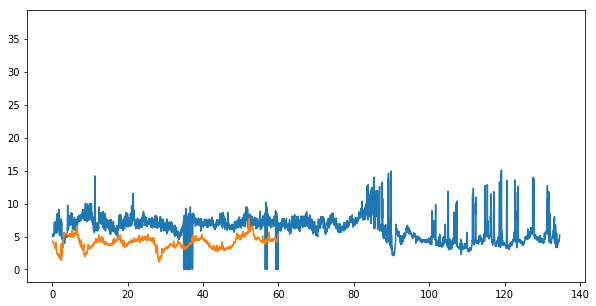

In [144]:
frame_1 = pd.read_csv(file_1)
frame_2 = pd.read_csv(file_2)
plt.plot(frame_1['timestamp'], preemphasis(frame_1['luminosity difference'])[:-1])
plt.plot(frame_2['timestamp'], preemphasis(frame_2['luminosity difference'])[:-1])

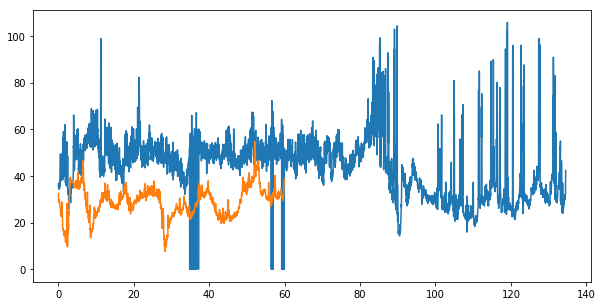

In [145]:
plt.plot(frame_1['timestamp'], frame_1['color difference'])
plt.plot(frame_2['timestamp'], frame_2['color difference'])

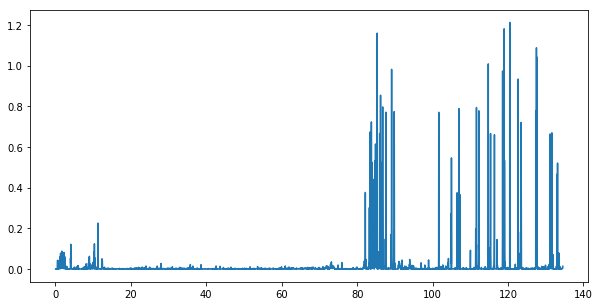

In [146]:
plt.plot(frame_1['timestamp'], frame_1['kl divergence'])

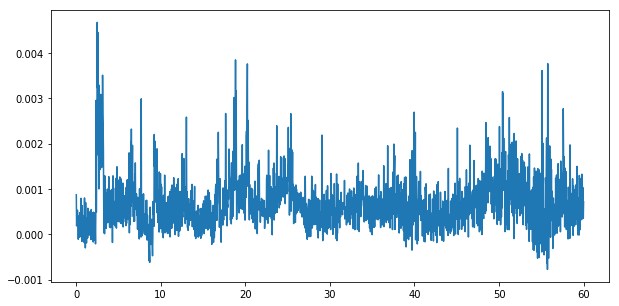

In [147]:
plt.plot(frame_2['timestamp'], frame_2['kl divergence'])

Ts:  0.03333333333333144
Fs, fps 30.000000000001705
Most best freq: 0.007436787307883417
Periodicity: 134.46666666665902


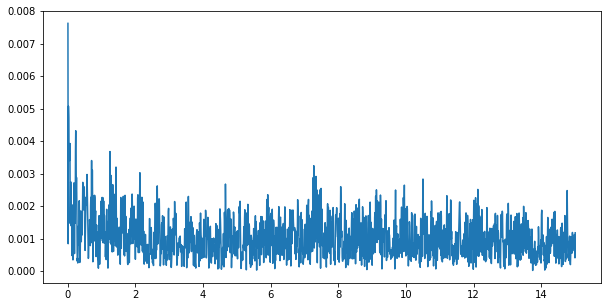

In [148]:
frq, fft = get_fft(frame_1['kl divergence'], frame_1['timestamp'], 1000000)
where_most = np.argmax(fft)
print("Most best freq: {}".format(frq[where_most]))
print("Periodicity: {}".format(1 / frq[where_most]))
plt.plot(frq, fft)

Ts:  0.033366700033354846
Fs, fps 29.970000000010646
Most best freq: 0.06674832962140456
Periodicity: 14.981648314976326


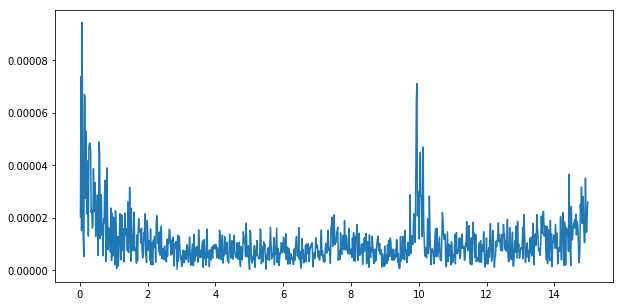

In [149]:
frq, fft = get_fft(frame_2['kl divergence'], frame_2['timestamp'], 1000000)
where_most = np.argmax(fft)
print("Most best freq: {}".format(frq[where_most]))
print("Periodicity: {}".format(1 / frq[where_most]))
plt.plot(frq, fft)